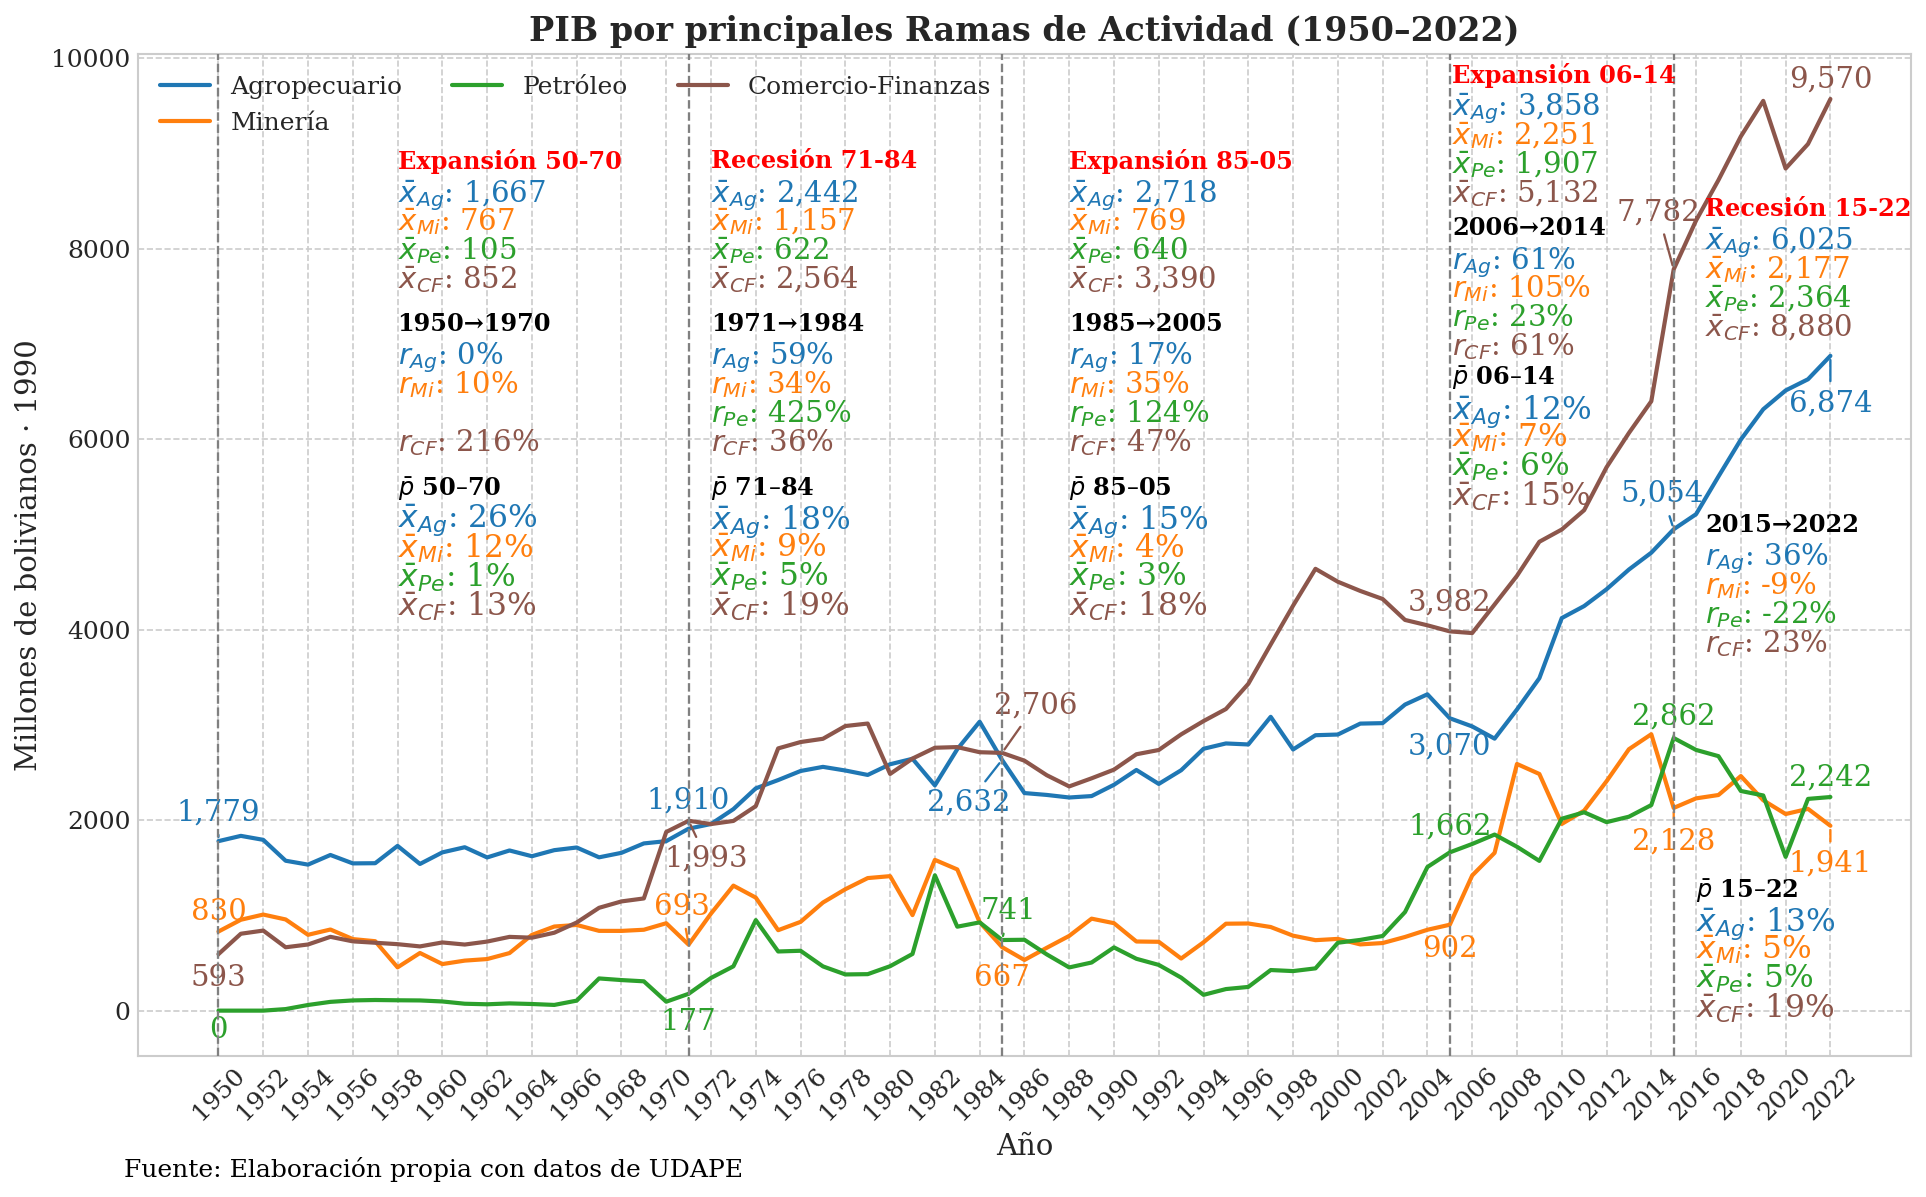

In [ ]:
# ── Imports ──────────────────────────────────────────────────────────
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3, os, sys
sys.path.append(os.path.abspath('../'))
from graficos_utils import *
from config import *

# ── Configuración general ────────────────────────────────────────────
# Dirección
output_dir = "../../../../assets/tesis/serie_completa/pib"
os.makedirs(output_dir, exist_ok=True)

# Estilos
set_style()

# Carga de datos
with sqlite3.connect('../../../../db/proyectomacro.db') as conn:
    df = (pd.read_sql('SELECT * FROM pib_ramas', conn, index_col='año')
            .sort_index()) / 1000        # miles → millones

# Sectores y columnas
componentes = [
    ("agropecuario",      "Agropecuario"),
    ("mineria",           "Minería"),
    ("petroleo",          "Petróleo"),
    ("comercio_finanzas", "Comercio-Finanzas"),
]
cols_componentes = [col for col, _ in componentes]

# Abreviaturas
abbr = {
    "agropecuario":      "Ag",
    "mineria":           "Mi",
    "petroleo":          "Pe",
    "comercio_finanzas": "CF",
}

# ── Preparación ──────────────────────────────────────────────────────
annot_years=adjust_annot_years(df,annot_years_sin_crisis)
# Ciclos y estadísticas
CYCLES_SIN_CRISIS = adjust_cycles(df, CYCLES_SIN_CRISIS)
cycle_stats_sin_crisis = {
    name: df.loc[period, cols_componentes].mean().to_dict()
    for name, period in CYCLES_SIN_CRISIS.items()
}
periodos_sin_crisis=adjust_periods(df,periodos_tasas_sin_crisis)
# Colores personalizados
custom_colors = {
    "agropecuario":      "#1f77b4",  # blue
    "mineria":           "#ff7f0e",  # orange
    "petroleo":          "#2ca02c",  # green
    "comercio_finanzas": "#8c564b",  # café
}

# ── Offsets ──────────────────────────────────────────────────────────
annotation_offsets = {
    "agropecuario": {
        1950: (0, 300), 1971: (0, 300), 1985: (-1.5, -450),
        2005: (0, -300), 2015: (-0.5, 370), 2022: (0, -500)
    },
    "mineria": {
        1950: (0, 200), 1971: (-0.3, 400), 1985: (0, -320),
        2005: (0, -250), 2015: (0, -350), 2022: (0, -400)
    },
    "petroleo": {
        1950: (0, -200), 1971: (0, -300), 1985: (0.3, 300),
        2005: (0, 270), 2015: (0, 220), 2022: (0, 200)
    },
    "comercio_finanzas": {
        1950: (0, -250), 1971: (0.8, -400), 1985: (1.5, 500),
        2005: (0, 300), 2015: (-0.7, 600), 2022: (0, 200)
    },
}

hitos_offset = {1950: 0.45, 1971: 0.50, 1985: 0.50, 2005: 0.62, 2015: 0.48}

medias_offsets = {
    "Expansión 50-70": (1958, 0.90),
    "Recesión 71-84":  (1972, 0.90),
    "Expansión 85-05": (1988, 0.90),
    "Expansión 06-14": (2005.1, 0.99),
    "Recesión 15-22":  (2016.4, 0.85),
}

period_offsets = {
    "1950-1970": (1958, 0.73),
    "1971-1984": (1972, 0.73),
    "1985-2005": (1988, 0.73),
    "2006-2014": (2005.1, 0.83),
    "2015-2022": (2016.4, 0.52),
}

participation_offsets = {
    "1950-1970": (1958, 0.56),
    "1971-1984": (1972, 0.56),
    "1985-2005": (1988, 0.56),
    "2006-2014": (2005.1, 0.675),
    "2015-2022": (2016, 0.14),
}

# ── Gráfica ──────────────────────────────────────────────────────────
fig, ax=init_base_plot(
    df=df,
    series=componentes,
    colors=custom_colors,
    title=f"PIB por principales Ramas de Actividad ({df.index[0]}–{df.index[-1]})",
    xlabel="Año",
    ylabel="Millones de bolivianos · 1990",
    source_text="Fuente: Elaboración propia con datos de UDAPE"
)

# Hitos verticales
add_hitos(ax, df.index, hitos_v_sin_crisis, hitos_offset)

# Anotaciones de valores por año
add_year_value_annotations(
    ax, df, annot_years,
    cols_componentes, annotation_offsets, custom_colors
)

# Cuadros de medias por ciclo
y_max = ax.get_ylim()[1]
line_spacing = y_max * 0.03
add_cycle_means_multi(
    ax, cycle_stats_sin_crisis, medias_offsets,
    abbr, custom_colors, line_spacing
)



# Anotaciones de tasas de crecimiento por periodo
add_period_growth_annotations_multi(
    ax, df, periodos_sin_crisis, cols_componentes,
    period_offsets, custom_colors, abbr
)

# Cuadros de participación por ciclo
add_participation_cycle_boxes(
    ax, df, periodos_sin_crisis, cols_componentes, "pib_real",
    participation_offsets, abbr, custom_colors
)


plt.show()


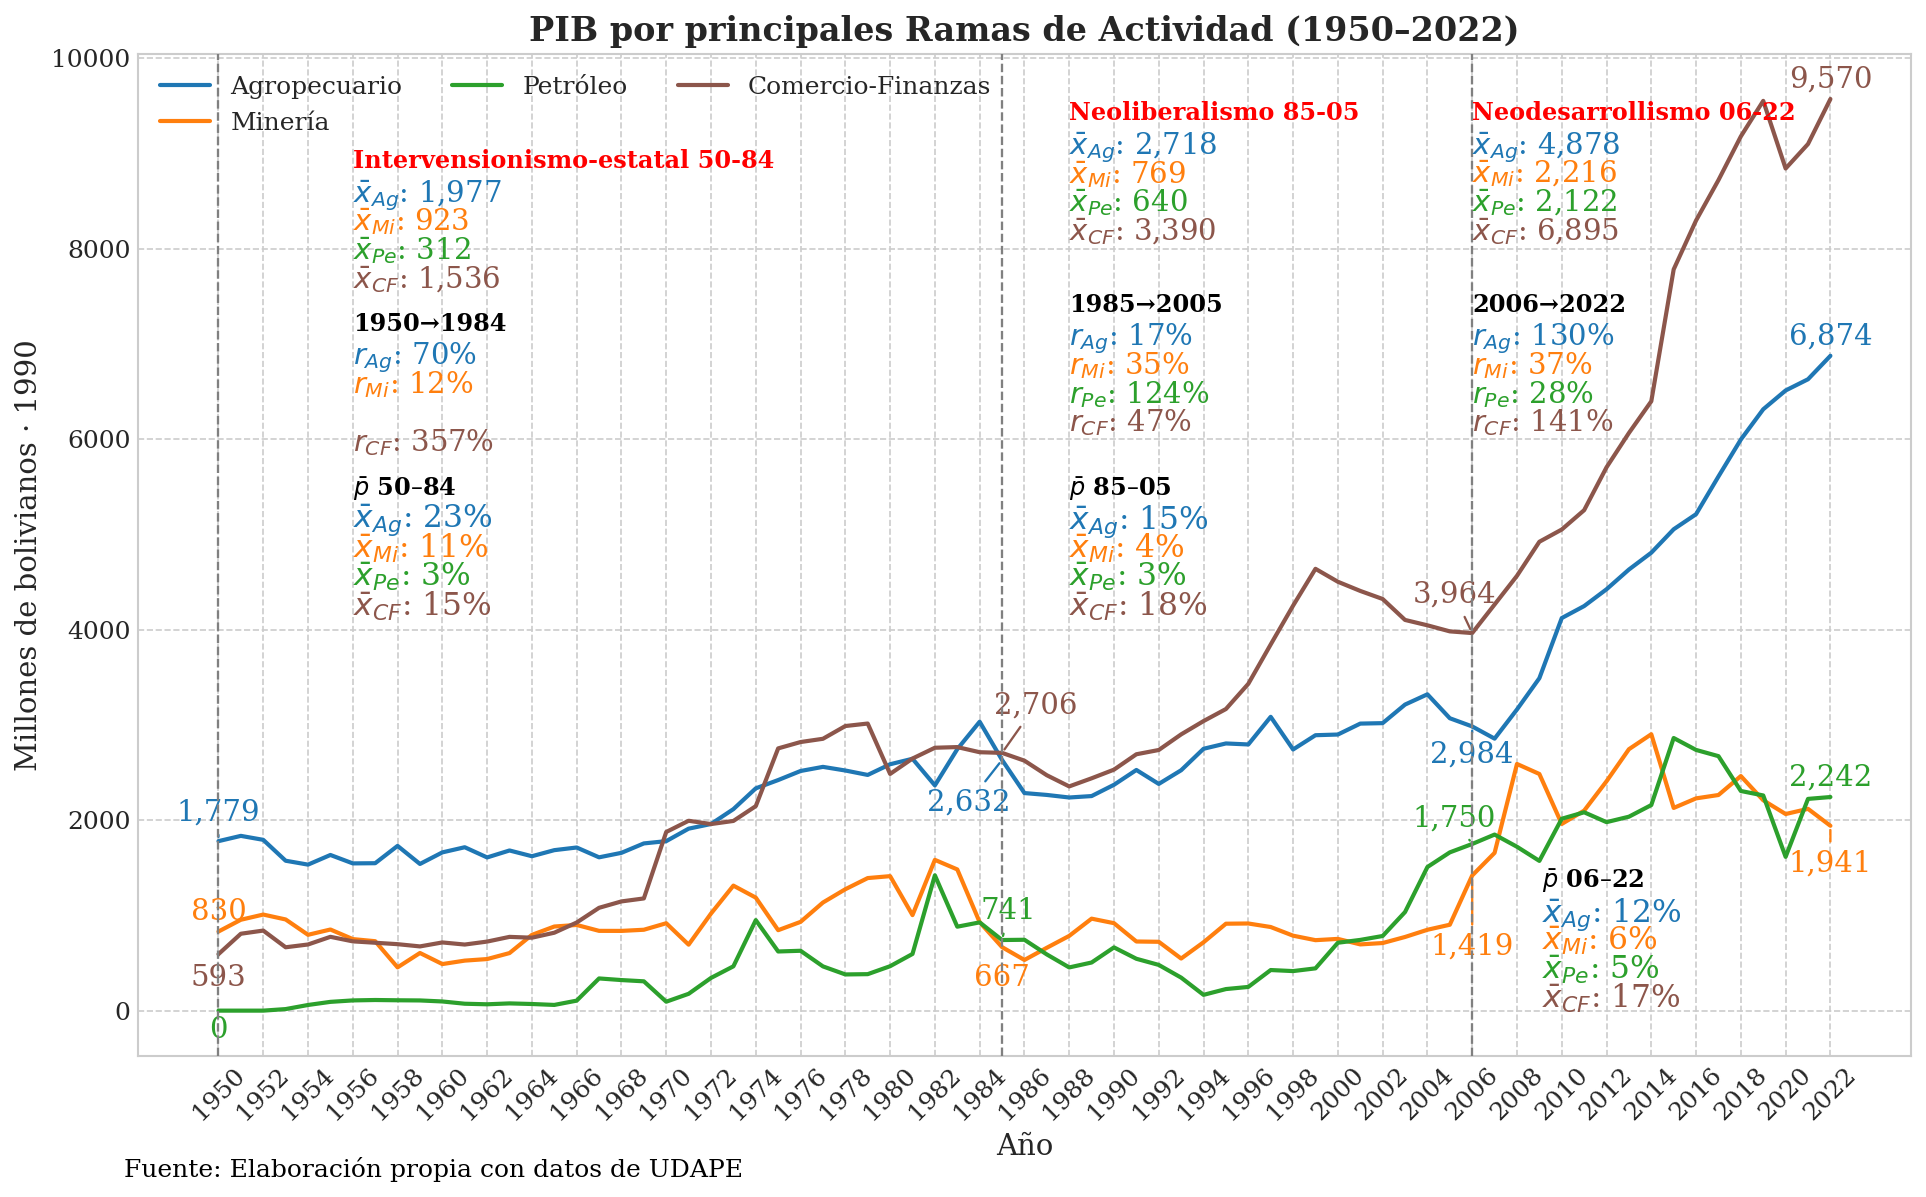

In [6]:
# Estadísticas de ciclos
annot_years_periodos=adjust_annot_years(df,annot_years_periodos)
CYCLES_PERIODOS=adjust_cycles(df,CYCLES_PERIODOS)
cycle_stats_periodos = {
    name: df.loc[period, cols_componentes].mean().to_dict()
    for name, period in CYCLES_PERIODOS.items()
}
periodos_periodos=adjust_periods(df,periodos_tasas_periodos)

# ── Offsets ──────────────────────────────────────────────────────────
# Desplazamientos de anotaciones por rama y año
annotation_offsets = {
    "agropecuario": {
        1950: (0, 300), 1985: (-1.5, -450),
        2006: (0, -300), 2022:(0,200)
    },
    "mineria": {
        1950: (0, 200), 1985: (0, -320),
        2006: (0, -750), 2022:(0,-400)
    },
    "petroleo": {
        1950: (0, -200), 1985: (0.3, 300),
        2006: (-0.8, 270),
        2022:(0,200)
    },
    "comercio_finanzas": {
        1950: (0, -250), 1985: (1.5, 500),
        2006: (-0.8, 400),
        2022:(0,200)
    },
}

# Hitos verticales
hitos_offset = {
    1950: 0.45, 1985: 0.50, 2006: 0.50,
}

# Desplazamientos de recuadros de periodo y texto
period_offsets = {
    "1950-1984": (1956, 0.73),
    "1985-2005": (1988, 0.75),
    "2006-2022": (2006, 0.75),
}
medias_offsets = {
    "Intervensionismo-estatal 50-84": (1956, 0.90),
    "Neoliberalismo 85-05": (1988, 0.95),
    "Neodesarrollismo 06-22": (2006, 0.95),
}

# Desplazamientos de participación por ciclo
participation_offsets = {
    "1950-1984": (1956, 0.56),
    "1985-2005": (1988, 0.56),
    "2006-2022": (2009.1, 0.15),
}

#grafica
fig, ax = init_base_plot(
    df=df,
    series=componentes,
    colors=custom_colors,
    title=f"PIB por principales Ramas de Actividad ({df.index[0]}–{df.index[-1]})",
    xlabel="Año",
    ylabel="Millones de bolivianos · 1990",
    source_text="Fuente: Elaboración propia con datos de UDAPE"
)

# Líneas de hitos y anotaciones
add_hitos(ax, df.index, hitos_v_periodos, hitos_offset)
add_year_value_annotations(
    ax, df, annot_years_periodos, cols_componentes,
    annotation_offsets, custom_colors
)

add_cycle_means_multi(
    ax, cycle_stats_periodos, medias_offsets,
    abbr, custom_colors, line_spacing=line_spacing
)

# Tasas de crecimiento por periodo
add_period_growth_annotations_multi(
    ax, df, periodos_periodos, cols_componentes,
    period_offsets, custom_colors, abbr
)

# Cuadros de participación por ciclo
add_participation_cycle_boxes(
    ax, df, periodos_periodos, cols_componentes,
    "pib_real", participation_offsets,
    abbr, custom_colors
)

plt.savefig(os.path.join(output_dir, "pib_rama_de_actividad_2.png"))
plt.show()


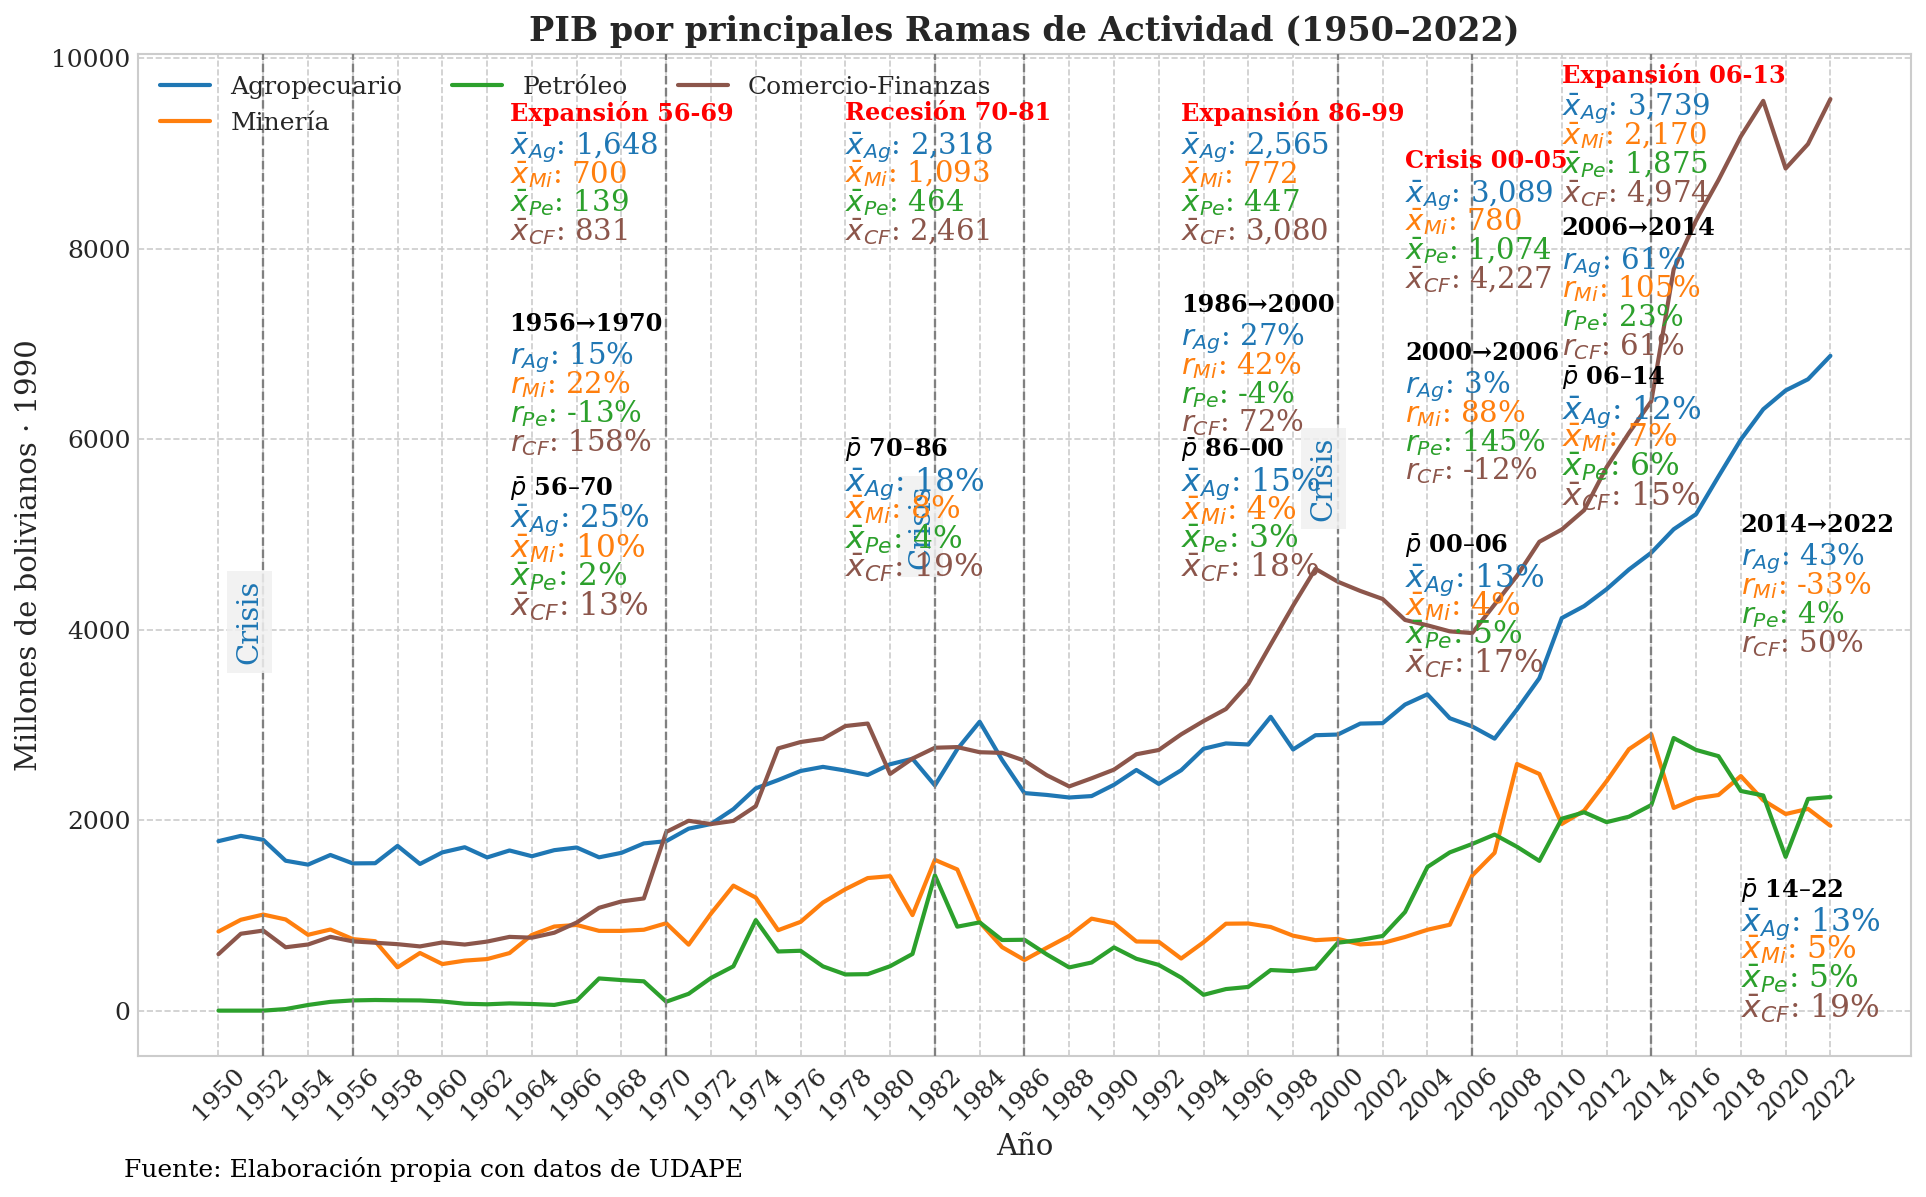

In [4]:
# Estadísticas de ciclos
annot_years=adjust_annot_years(df,annot_years)
CYCLES=adjust_cycles(df,CYCLES)
cycle_stats = {
    name: df.loc[period, cols_componentes].mean().to_dict()
    for name, period in CYCLES.items()
}
periodos=adjust_periods(df,periodos_tasas)

# ── Offsets ──────────────────────────────────────────────────────────
# Desplazamientos de anotaciones por rama y año (anot_years)
annotation_offsets = {
    "agropecuario": {
        1952: (0, 300), 1956: (0, 350), 1970: (-1.5, -450),
        1982: (0, -300), 1986: (-1.0, 400), 2000: (0, -200),
        2006: (0, -300), 2014: (1.0, 450), 2023: (0, -500),
    },
    "mineria": {
        1952: (0, 200), 1956: (0, 250), 1970: (0, -320),
        1982: (0.5, -400), 1986: (0, -350), 2000: (0, -300),
        2006: (0, -750), 2014: (0.5, 500), 2023: (0, -400),
    },
    "petroleo": {
        1952: (0, -200), 1956: (0.3, -250), 1970: (0.3, 300),
        1982: (0, -300), 1986: (0.5, 350), 2000: (-0.5, 250),
        2006: (-0.8, 270), 2014: (0.5, 300), 2023: (0, 200),
    },
    "comercio_finanzas": {
        1952: (0, -250), 1956: (1.5, -300), 1970: (1.5, 500),
        1982: (0, 300), 1986: (1.0, 550), 2000: (-0.7, 400),
        2006: (-0.8, 400), 2014: (1.2, 600), 2023: (0, 200),
    },
}

# Hitos verticales: fracción de eje Y (0–1) en el inicio de cada ciclo
hitos_offset = {
    1952: 0.45, 1956: 0.50, 1970: 0.50,
    1982: 0.55, 1986: 0.48, 2000: 0.60,
    2006: 0.62, 2014: 0.50, 2023: 0.48,
}

# Desplazamientos de recuadros de tasa y texto por periodo
period_offsets = {
    "1956-1970": (1963, 0.73),
    "1970-1982": (1978, 0.75),
    "1986-2000": (1993, 0.75),
    "2000-2006": (2003, 0.70),
    "2006-2014": (2010, 0.83),
    "2014-2022": (2018, 0.52),
}
text_offsets = {
    "Expansión 56-69": (1963, 0.95),
    "Recesión 70-81": (1978, 0.95),
    "Expansión 86-99": (1993, 0.95),
    "Crisis 00-05": (2003, 0.90),
    "Expansión 06-13": (2010, 0.99),
    "Recesión 14-23": (2018, 0.85),
}

# Desplazamientos de cuadros de participación por periodo
participation_offsets = {
    "1956-1970": (1963, 0.56),
    "1970-1986": (1978, 0.60),
    "1986-2000": (1993, 0.60),
    "2000-2006": (2003, 0.50),
    "2006-2014": (2010, 0.675),
    "2014-2022": (2018, 0.14),
}
#grafica
fig, ax = init_base_plot(
    df=df,
    series=componentes,
    colors=custom_colors,
    title=f"PIB por principales Ramas de Actividad ({df.index[0]}–{df.index[-1]})",
    xlabel="Año",
    ylabel="Millones de bolivianos · 1990",
    source_text="Fuente: Elaboración propia con datos de UDAPE"
)

# Líneas de hitos y anotaciones
add_hitos(ax, df.index, hitos_v, hitos_offset)
add_year_value_annotations(
    ax, df, annot_years, cols_componentes,
    annotation_offsets, custom_colors
)

add_cycle_means_multi(
    ax, cycle_stats, text_offsets,
    abbr, custom_colors, line_spacing=line_spacing
)

# Tasas de crecimiento por periodo
add_period_growth_annotations_multi(
    ax, df, periodos, cols_componentes,
    period_offsets, custom_colors, abbr
)

# Cuadros de participación por ciclo
add_participation_cycle_boxes(
    ax, df, periodos, cols_componentes,
    "pib_real", participation_offsets,
    abbr, custom_colors
)

plt.savefig(os.path.join(output_dir, "pib_rama_de_actividad_2.png"))
plt.show()

In [5]:
print(cycle_stats)

{'Crisis 52-55': {'agropecuario': 1633.48359928746, 'mineria': 903.3896578287433, 'petroleo': 41.89356358264517, 'comercio_finanzas': 743.7664519077348}, 'Expansión 56-69': {'agropecuario': 1647.837812505897, 'mineria': 700.0417382362118, 'petroleo': 139.05379937102177, 'comercio_finanzas': 830.9649967289173}, 'Recesión 70-81': {'agropecuario': 2318.36350606528, 'mineria': 1093.367606920985, 'petroleo': 463.94714717853844, 'comercio_finanzas': 2460.5433822830073}, 'Crisis 82-85': {'agropecuario': 2693.7378737119975, 'mineria': 1165.0925833471458, 'petroleo': 992.4290712673418, 'comercio_finanzas': 2736.4654442541973}, 'Expansión 86-99': {'agropecuario': 2564.788904839145, 'mineria': 771.7847595355944, 'petroleo': 446.6895054604019, 'comercio_finanzas': 3079.9217849060506}, 'Crisis 00-05': {'agropecuario': 3089.005655324752, 'mineria': 780.3479939890176, 'petroleo': 1073.8377155117844, 'comercio_finanzas': 4226.578531600445}, 'Expansión 06-13': {'agropecuario': 3739.2520751555594, 'mine